## Big data analytics: Big Data Bowl 
Authored by Jason Maloney, Connor Gendron, and Jesse Pezzillo

In [1]:
# Import packages
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings; warnings.simplefilter('ignore')
import pickle

In [2]:
# This dataset can be downloaded from https://www.kaggle.com/c/nfl-big-data-bowl-2020/data after an agreement is digitally signed through kaggle. 
#data = pd.read_csv('train.csv')
#lower all columns
#data.columns = map(str.lower, data.columns)

In [2]:
##### USE THIS TO LOAD THE DATA - ALREADY HAS ALL THE FEATURES

data = pd.read_pickle('data.pkl copy')

#### View the data and types

In [34]:
print(data.dtypes)

gameid                    int64
playid                    int64
team                     object
x                       float64
y                       float64
                         ...   
eff_downfield_acc       float64
eff_crossfield_acc      float64
rushteamwinning           int64
playerblocked             int64
total_playersblocked      int64
Length: 107, dtype: object


In [4]:
pd.set_option('max_columns', 110)
data.head()

,gameid,playid,team,x,y,s,a,dis,orientation,dir,nflid,displayname,jerseynumber,season,yardline,quarter,gameclock,possessionteam,down,distance,fieldposition,homescorebeforeplay,visitorscorebeforeplay,nflidrusher,offenseformation,offensepersonnel,defendersinthebox,defensepersonnel,playdirection,timehandoff,timesnap,yards,playerheight,playerweight,playerbirthdate,playercollegename,position,hometeamabbr,visitorteamabbr,week,stadium,location,stadiumtype,turf,gameweather,temperature,humidity,windspeed,winddirection,age,time_since_snap,rusher,rushx,rushy,disttorush,teamidentity,min_distancetorusher,ol_d,dl,lb,db,rb_d,qb,ol,rb,te,wr,dl_o,lb_o,db_o,yardfromowngoal,x_standard,y_standard,runsuccess,temp,avgyardspergame,mean_yards_per_rush,x_handoff,y_handoff,1_sec_x,1_5_sec_x,2_sec_x,2_5_sec_x,3_sec_x,3_5_sec_x,4_sec_x,4_5_sec_x,5_sec_x,5_5_sec_x,6_sec_x,1_sec_y,1_5_sec_y,2_sec_y,2_5_sec_y,3_sec_y,3_5_sec_y,4_sec_y,4_5_sec_y,5_sec_y,5_5_sec_y,6_sec_y,offense,eff_downfield_acc,eff_crossfield_acc,rushteamwinning,playerblocked,total_playersblocked
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,278.01,272.82,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,72,212,1988-12-29,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,29,1,0,78.75,30.53,6.480872,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,46.09,18.493333,1,2017090700KC,5.557692,4.301493,46.200942,16.241064,46.200942,46.277261,46.367479,46.471595,46.589610,46.721523,46.867335,47.027045,47.200654,47.388162,47.589568,16.241064,14.691693,12.860163,10.746476,8.350631,5.672628,2.712467,0.000000,0.000000,0.000000,0.000000,0,0.055594,-1.128632,0,0,11
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,332.39,251.30,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,75,288,1989-03-25,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,28,1,0,78.75,30.53,4.593310,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,45.33,20.693333,1,2017090700KC,5.557692,4.301493,44.978929,19.656138,44.978929,44.641083,44.195030,43.640770,42.978304,42.207630,41.328750,40.341663,39.246369,38.042867,36.731160,19.656138,18.658015,17.340209,15.702719,13.745546,11.468689,8.872149,5.955925,2.720018,0.000000,0.000000,0,-0.432828,-1.278734,0,0,11
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,356.99,247.27,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,75,270,1989-01-21,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,28,1,0,78.75,30.53,5.448982,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,46.00,20.133333,1,2017090700KC,5.557692,4.301493,45.414621,18.735994,45.414621,45.036442,44.601272,44.109109,43.559953,42.953805,42.290665,41.570533,40.793408,39.959291,39.068181,18.735994,17.833258,16.794477,15.619652,14.308782,12.861868,11.278909,9.559905,7.704857,5.713764,3.586627,0,-0.227970,-0.544178,0,0,11
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,0.23,344.36,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,75,245,1982-11-22,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,35,1,0,78.75,30.53,7.820038,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,48.54,25.633333,1,2017090700KC,5.557692,4.301493,49.204452,25.447315,49.204452,49.731681,50.388911,51.176143,52.093376,53.140611,54.317848,55.625086,57.062325,58.629566,60.326809,25.447315,25.299713,25.115716,24.895325,24.638538,24.345357,24.015780,23.649809,23.247443,22.808681

# Exploratory Data Analysis

## Colleges with Most NFL Players

In [3]:
# get players and their college
college = data[['displayname', 'playercollegename']]
college = college.drop_duplicates('displayname')
college = pd.DataFrame(college['playercollegename'].value_counts())
college['name'] = college.index
college.index = range(len(college))
college = college[:15]
college

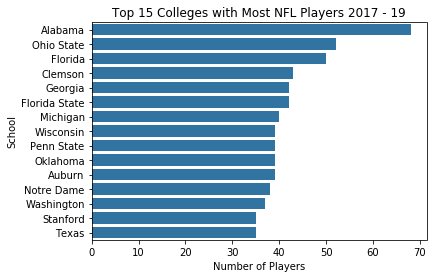

In [4]:
sns.barplot(x = 'playercollegename', y = 'name', data = college,
           color = 'tab:blue') 
plt.title('Top 15 Colleges with Most NFL Players 2017 - 19')
plt.xlabel('Number of Players')
plt.ylabel('School')
plt.show()
del college

## Colleges with the Top Rushers

In [52]:
col_rush = data[['playercollegename', 'yards', 'rusher']]
col_rush = col_rush.loc[col_rush['rusher'] == 1]
col_rush = col_rush.groupby('playercollegename').sum().sort_values('yards', ascending = False)[:10]
col_rush['name'] = col_rush.index
col_rush

,yards,rusher,name
playercollegename,,,
Alabama,8791,1912,Alabama
Georgia,6785,1485,Georgia
Oklahoma,6754,1681,Oklahoma
Ohio State,6211,1464,Ohio State
Pittsburgh,5077,1235,Pittsburgh
Indiana,4419,1075,Indiana
Florida State,3824,867,Florida State
Wisconsin,3793,918,Wisconsin
California,3142,704,California


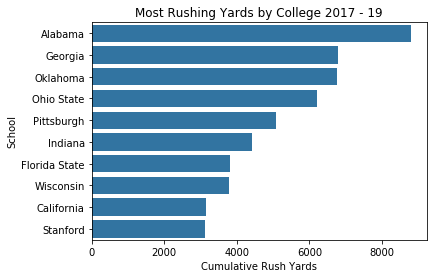

In [57]:
sns.barplot(y = 'name', x = 'yards', data = col_rush, color = 'tab:blue')
plt.title('Most Rushing Yards by College 2017 - 19')
plt.xlabel('Cumulative Rush Yards')
plt.ylabel('School')
plt.show()
del col_rush

## Longest Rushes

In [79]:
df17 = data.loc[(data['season'] == 2017)&(data['rusher'] == 1)][['displayname', 'yards', 'teamidentity']].sort_values('yards', ascending = False)[:10]
df17.index = np.arange(0,10)
df17

,displayname,yards,teamidentity
0,Leonard Fournette,90,JAX
1,Melvin Gordon,87,LAC
2,Orleans Darkwa,75,NYG
3,DeMarco Murray,75,TEN
4,Leonard Fournette,75,JAX
5,Bilal Powell,75,NYJ
6,Alvin Kamara,74,NO
7,Mark Ingram,72,NO
8,Derrick Henry,72,TEN
9,Jay Ajayi,71,PHI


In [78]:
df18 = data.loc[(data['season'] == 2018)&(data['rusher'] == 1)][['displayname', 'yards', 'teamidentity']].sort_values('yards', ascending = False)[:10]
df18.index = np.arange(0,10)
df18

,displayname,yards,teamidentity
0,Derrick Henry,99,TEN
1,Lamar Miller,97,HOU
2,Nick Chubb,92,CLE
3,Adrian Peterson,90,WAS
4,Saquon Barkley,78,NYG
5,Isaiah Crowell,77,NYJ
6,Kalen Ballage,75,MIA
7,Kerryon Johnson,71,DET
8,Dalvin Cook,70,MIN
9,Saquon Barkley,68,NYG


In [80]:
df19 = data.loc[(data['season'] == 2019)&(data['rusher'] == 1)][['displayname', 'yards', 'teamidentity']].sort_values('yards', ascending = False)[:10]
df19.index = np.arange(0,10)
df19

,displayname,yards,teamidentity
0,Damien Williams,91,KC
1,Nick Chubb,88,CLE
2,Christian McCaffrey,84,CAR
3,Matt Breida,83,SF
4,Leonard Fournette,81,JAX
5,Christian McCaffrey,76,CAR
6,Dalvin Cook,75,MIN
7,Derrick Henry,74,TEN
8,Leonard Fournette,69,JAX
9,Derrick Henry,68,TEN


### Distribution of Distance to Rusher

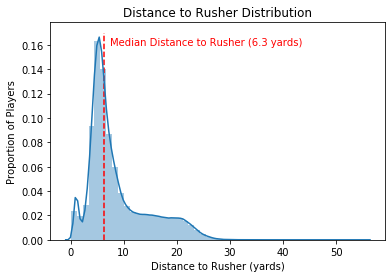

In [5]:
# distribution of players' distance to rusher
sns.distplot(data['disttorush'][data['rusher'] == 0])
plt.vlines(x = data['disttorush'].median(),
          ymin = 0,
          ymax = 0.17,
          colors = 'red',
          linestyles = 'dashed')
plt.text(x = data['disttorush'].median()+1,
        y = 0.16,
        s = 'Median Distance to Rusher (6.3 yards)',
        color = 'red')
plt.title('Distance to Rusher Distribution')
plt.xlabel('Distance to Rusher (yards)')
plt.ylabel('Proportion of Players')
plt.show()

## Yards Gained Distribution

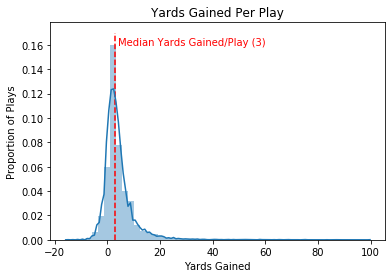

In [6]:
# distribution of yards gained/play
sns.distplot(data['yards'])
plt.vlines(x = data['yards'].median(),
          ymin = 0,
          ymax = 0.17,
          colors = 'red',
          linestyles = 'dashed')
plt.text(x = data['yards'].median()+1,
        y = 0.16,
        s = 'Median Yards Gained/Play (3)',
        color = 'red')
plt.title('Yards Gained Per Play')
plt.xlabel('Yards Gained')
plt.ylabel('Proportion of Plays')
plt.show()

## Yards Gained by Down

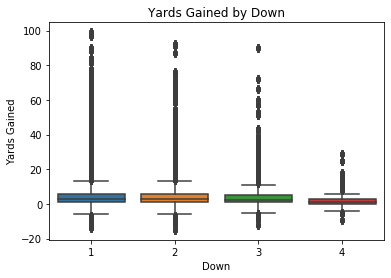

In [7]:
sns.boxplot(x = 'down', y = 'yards', data = data)
plt.title('Yards Gained by Down')
plt.xlabel('Down')
plt.ylabel('Yards Gained')
plt.show()

## Yards Gained by Quarter

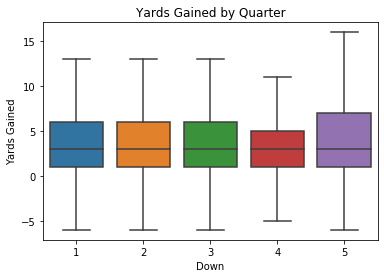

In [86]:
# Want to see outliers? set showfliers = True
sns.boxplot(x = 'quarter', y = 'yards', data = data, showfliers = False)
plt.title('Yards Gained by Quarter')
plt.xlabel('Down')
plt.ylabel('Yards Gained')
plt.show()

## Yards Gained by Defenders in the Box

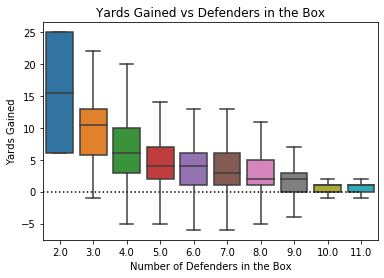

In [93]:
# Want to see outliers? set showfliers = True
sns.boxplot(x = 'defendersinthebox', y = 'yards', data = data, showfliers = False)
plt.hlines(y = 0, xmin = -0.5, xmax = 9, linestyles = 'dotted')
plt.xlabel('Number of Defenders in the Box')
plt.ylabel('Yards Gained')
plt.title('Yards Gained vs Defenders in the Box')
plt.show()

## Yards Gained by Offensive Formation

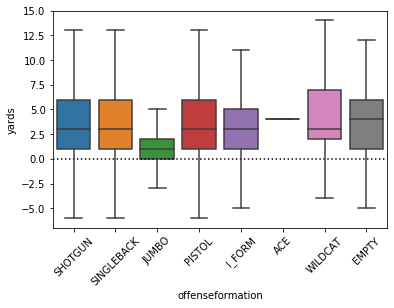

In [104]:
sns.boxplot(x = 'offenseformation', y = 'yards', data = data, showfliers = False)
plt.hlines(y = 0, xmin = -0.5, xmax = 7.5, linestyles = 'dotted')
plt.xticks(rotation = 45)
plt.ylabel('Yards')
plt.xlabel('Formation')
plt.title('Yards Gained by Offensive Formation')
plt.show()

## Yards Gained and Yards Lost

In [28]:
pyrd_count = len(data.loc[data['yards'] >= 0])
nyrd_count = len(data.loc[data['yards'] < 0])
yrd_count = [pyrd_count, nyrd_count]
pyavg = data['yards'].loc[data['yards'] >= 0].mean()
nyavg = data['yards'].loc[data['yards'] < 0].mean()
yrd_avg = [pyavg, nyavg]
play_pct = [round(yrd_count[0]/sum(yrd_count)*100,2), round(yrd_count[1]/sum(yrd_count)*100,2)]
lst = ['Positive', 'Negative']
yardsdf = pd.DataFrame(zip(lst,yrd_count, play_pct, yrd_avg), 
                       columns = ['Gain','Count', 'Perc', 'Mean'])
#yardsdf = yardsdf.melt(id_vars = 'Gain')
yardsdf

,Gain,Count,Perc,Mean
0,Positive,608916,89.26,5.010478
1,Negative,73238,10.74,-2.281166


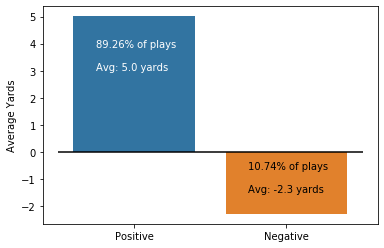

In [44]:
text = [str(yardsdf['Perc'][0]) + '% of plays\n\n' + 'Avg: ' + str(round(yardsdf['Mean'][0],1)) + ' yards',
       str(yardsdf['Perc'][1]) + '% of plays\n\n' + 'Avg: ' + str(round(yardsdf['Mean'][1],1)) + ' yards']

sns.barplot(x = 'Gain', y = 'Mean', data = yardsdf)
plt.xlabel('')
plt.ylabel('Average Yards')
plt.text(x = -0.25,
        y = yardsdf['Mean'][0] - 2,
        s = text[0],
        color = 'white')
plt.text(x = 0.75,
        y = yardsdf['Mean'][1] + 0.8,
        s = text[1]) 
plt.hlines(y = 0, xmin = -0.5, xmax = 1.5)
plt
plt.show()

## Rush Yards by Team

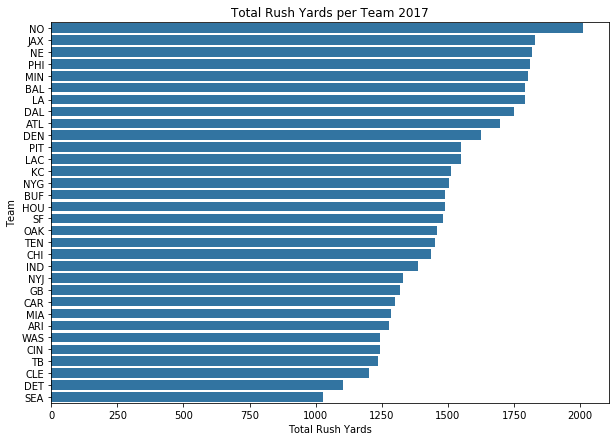

In [123]:
## 2017
df = pd.DataFrame(data.loc[(data['season'] == 2017)&(data['rusher'] == 1)][['yards', 'teamidentity']].groupby('teamidentity').sum().sort_values('yards', ascending = False))
df['name'] = df.index
df
plt.figure(figsize = (10, 7))
sns.barplot(y = 'name', x = 'yards', data = df, color = 'tab:blue')
plt.xlabel('Total Rush Yards')
plt.ylabel('Team')
plt.title('Total Rush Yards per Team 2017')
plt.show()

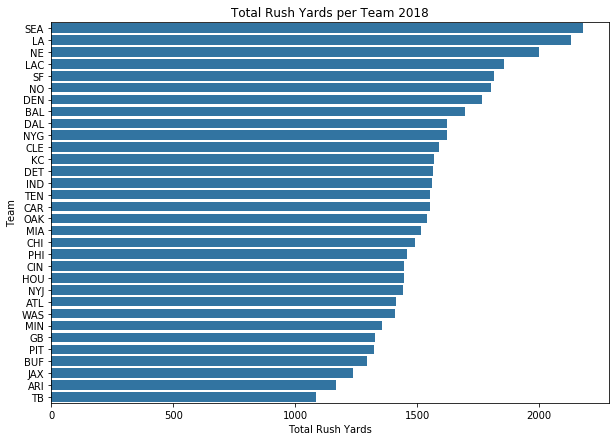

In [124]:
## 2018
df = pd.DataFrame(data.loc[(data['season'] == 2018)&(data['rusher'] == 1)][['yards', 'teamidentity']].groupby('teamidentity').sum().sort_values('yards', ascending = False))
df['name'] = df.index
df
plt.figure(figsize = (10, 7))
sns.barplot(y = 'name', x = 'yards', data = df, color = 'tab:blue')
plt.xlabel('Total Rush Yards')
plt.ylabel('Team')
plt.title('Total Rush Yards per Team 2018')
plt.show()

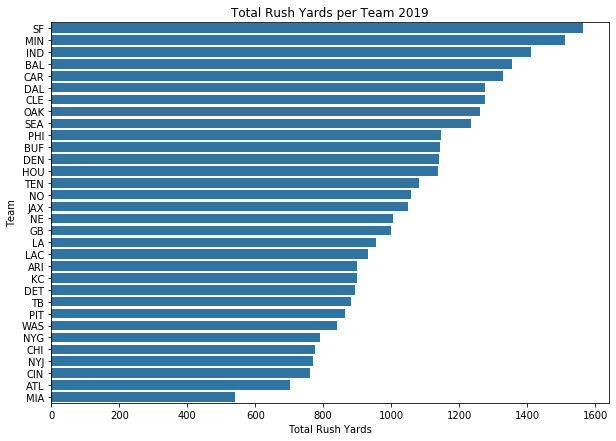

In [125]:
## 2019
df = pd.DataFrame(data.loc[(data['season'] == 2019)&(data['rusher'] == 1)][['yards', 'teamidentity']].groupby('teamidentity').sum().sort_values('yards', ascending = False))
df['name'] = df.index
df
plt.figure(figsize = (10, 7))
sns.barplot(y = 'name', x = 'yards', data = df, color = 'tab:blue')
plt.xlabel('Total Rush Yards')
plt.ylabel('Team')
plt.title('Total Rush Yards per Team 2019')
plt.show()

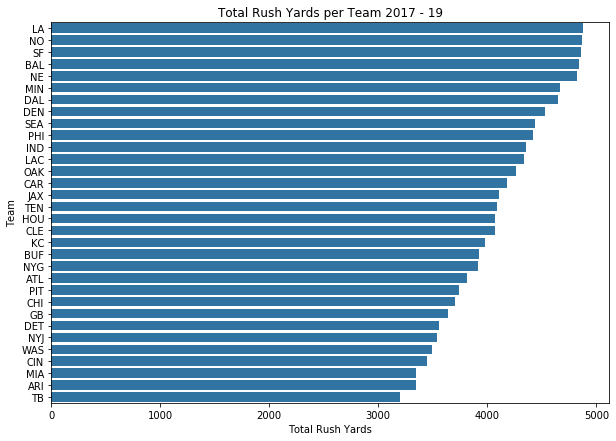

In [126]:
### All seasons
df = pd.DataFrame(data.loc[(data['rusher'] == 1)][['yards', 'teamidentity']].groupby('teamidentity').sum().sort_values('yards', ascending = False))
df['name'] = df.index
df
plt.figure(figsize = (10, 7))
sns.barplot(y = 'name', x = 'yards', data = df, color = 'tab:blue')
plt.xlabel('Total Rush Yards')
plt.ylabel('Team')
plt.title('Total Rush Yards per Team 2017 - 19')
plt.show()

## Comparison of Multiple Variables

<Figure size 720x720 with 0 Axes>

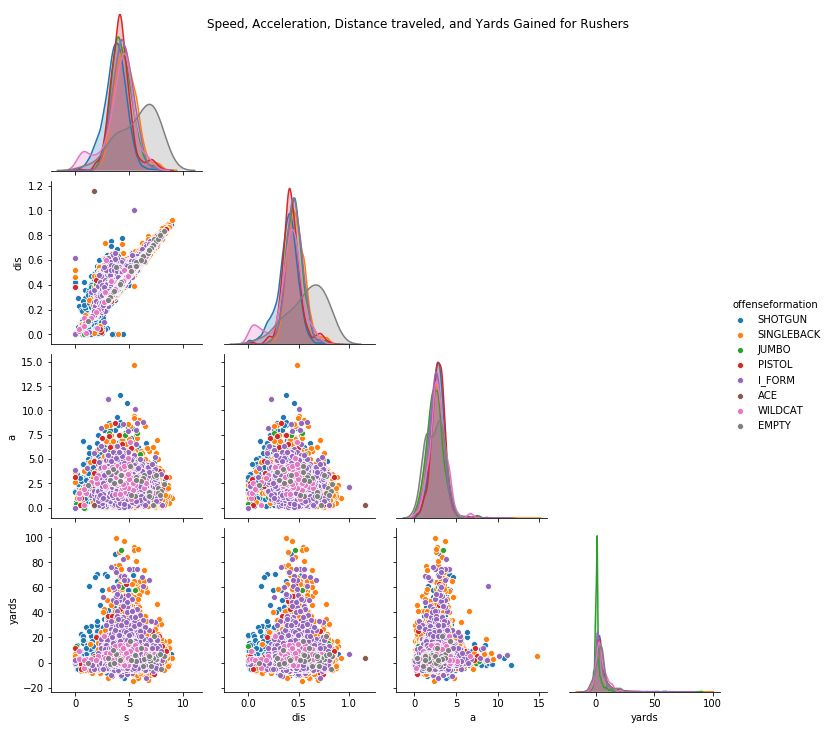

In [45]:
# Pair plot of speed, accleration, distance traveled, and yards gained
plt.figure(figsize = (10, 10))
df = data[data['nflidrusher'] == data['nflid']][['s','dis','a','yards','offenseformation']]
sns.pairplot(df, hue = 'offenseformation', corner = True)
plt.suptitle('Speed, Acceleration, Distance traveled, and Yards Gained for Rushers')
plt.show()


## Top 10 Rushers 2017 - 19

In [46]:
cols = ['teamidentity', 's', 'a', 'displayname', 'season', 'yards', 'age']
rush = data.loc[data['rusher'] == 1][cols]
top10 = rush[['displayname', 'yards']].groupby('displayname').sum().sort_values('yards', ascending = False)[:10]
top10['player'] = top10.index
top10.index = range(len(top10))

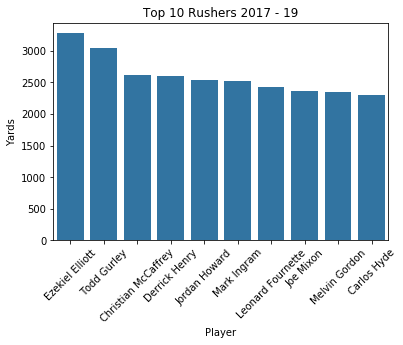

In [47]:
sns.barplot(x = 'player', y = 'yards', data = top10, color = 'tab:blue')
plt.title('Top 10 Rushers 2017 - 19')
plt.xlabel('Player')
plt.ylabel('Yards')
plt.xticks(rotation = 45)
plt.show()

## Average Yards by Time Since Snap

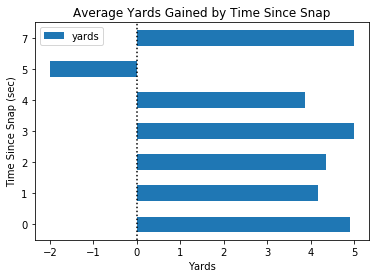

In [138]:
snap = pd.DataFrame(data.groupby('time_since_snap')['yards'].mean())
#sns.barplot(x = 'yards', y = snap.index, data = snap)
snap.plot(kind = 'barh')
plt.xlabel('Yards')
plt.ylabel('Time Since Snap (sec)')
plt.title('Average Yards Gained by Time Since Snap')
plt.vlines(x = 0, ymin = -0.5, ymax = 7, linestyles = 'dotted')
plt.show()

In [129]:
pd.set_option('max_columns', 110)
data.head()

,gameid,playid,team,x,y,s,a,dis,orientation,dir,nflid,displayname,jerseynumber,season,yardline,quarter,gameclock,possessionteam,down,distance,fieldposition,homescorebeforeplay,visitorscorebeforeplay,nflidrusher,offenseformation,offensepersonnel,defendersinthebox,defensepersonnel,playdirection,timehandoff,timesnap,yards,playerheight,playerweight,playerbirthdate,playercollegename,position,hometeamabbr,visitorteamabbr,week,stadium,location,stadiumtype,turf,gameweather,temperature,humidity,windspeed,winddirection,age,time_since_snap,rusher,rushx,rushy,disttorush,teamidentity,min_distancetorusher,ol_d,dl,lb,db,rb_d,qb,ol,rb,te,wr,dl_o,lb_o,db_o,yardfromowngoal,x_standard,y_standard,runsuccess,temp,avgyardspergame,mean_yards_per_rush,x_handoff,y_handoff,1_sec_x,1_5_sec_x,2_sec_x,2_5_sec_x,3_sec_x,3_5_sec_x,4_sec_x,4_5_sec_x,5_sec_x,5_5_sec_x,6_sec_x,1_sec_y,1_5_sec_y,2_sec_y,2_5_sec_y,3_sec_y,3_5_sec_y,4_sec_y,4_5_sec_y,5_sec_y,5_5_sec_y,6_sec_y,offense,eff_downfield_acc,eff_crossfield_acc,rushteamwinning,playerblocked,total_playersblocked
0,2017090700,20170907000118,away,73.91,34.84,1.69,1.13,0.40,278.01,272.82,496723,Eric Berry,29,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,72,212,1988-12-29,Tennessee,SS,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,29,1,0,78.75,30.53,6.480872,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,46.09,18.493333,1,2017090700KC,5.557692,4.301493,46.200942,16.241064,46.200942,46.277261,46.367479,46.471595,46.589610,46.721523,46.867335,47.027045,47.200654,47.388162,47.589568,16.241064,14.691693,12.860163,10.746476,8.350631,5.672628,2.712467,0.000000,0.000000,0.000000,0.000000,0,0.055594,-1.128632,0,0,11
1,2017090700,20170907000118,away,74.67,32.64,0.42,1.35,0.01,332.39,251.30,2495116,Allen Bailey,97,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,75,288,1989-03-25,Miami,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,28,1,0,78.75,30.53,4.593310,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,45.33,20.693333,1,2017090700KC,5.557692,4.301493,44.978929,19.656138,44.978929,44.641083,44.195030,43.640770,42.978304,42.207630,41.328750,40.341663,39.246369,38.042867,36.731160,19.656138,18.658015,17.340209,15.702719,13.745546,11.468689,8.872149,5.955925,2.720018,0.000000,0.000000,0,-0.432828,-1.278734,0,0,11
2,2017090700,20170907000118,away,74.00,33.20,1.22,0.59,0.31,356.99,247.27,2495493,Justin Houston,50,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,75,270,1989-01-21,Georgia,DE,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,28,1,0,78.75,30.53,5.448982,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,46.00,20.133333,1,2017090700KC,5.557692,4.301493,45.414621,18.735994,45.414621,45.036442,44.601272,44.109109,43.559953,42.953805,42.290665,41.570533,40.793408,39.959291,39.068181,18.735994,17.833258,16.794477,15.619652,14.308782,12.861868,11.278909,9.559905,7.704857,5.713764,3.586627,0,-0.227970,-0.544178,0,0,11
3,2017090700,20170907000118,away,71.46,27.70,0.42,0.54,0.02,0.23,344.36,2506353,Derrick Johnson,56,2017,35,1,14:14:00,NE,3,2,NE,0,0,2543773,SHOTGUN,"1 RB, 1 TE, 3 WR",6.0,"2 DL, 3 LB, 6 DB",left,2017-09-08 00:44:06+00:00,2017-09-08 00:44:05+00:00,8,75,245,1982-11-22,Texas,ILB,NE,KC,1,Gillette Stadium,"Foxborough, MA",1.0,Field Turf,Clear and warm,63.0,77.0,8.0,SW,35,1,0,78.75,30.53,7.820038,KC,4.59331,0,2,3,6,0,1,5,1,1,3,0,0,0,35,48.54,25.633333,1,2017090700KC,5.557692,4.301493,49.204452,25.447315,49.204452,49.731681,50.388911,51.176143,52.093376,53.140611,54.317848,55.625086,57.062325,58.629566,60.326809,25.447315,25.299713,25.115716,24.895325,24.638538,24.345357,24.015780,23.649809,23.247443,22.808681

## Plot Football Field

In [262]:
import matplotlib.patches as patches
# los = line of scrimmage
'''
function defines default parameters that can be turned on/off
returns rectangle that resembles the field
bottom left corner is (0,0)

parameters: 
    turn on/off 
        - line numbers 
        - endzones
        - highlighted los
        - fifty yard line as default los
    highlight_los_number = yard line of los
'''
def plot_field(linenumbers = True, # show numbers on the field
              endzones = True, # can turn endzones on/off
              highlight_los = False, # show line of scrimmage
              highlight_los_number = 50, # default line of scrimmage = 50
              highlighted_name = 'Line of Scrimmage',
              fifty_is_los = False, # use default line of scrimmage
              figsize = (12, 5.33)): # 1/10 scale of the 120 x 53.3
    # define the rectangle that is the field
    field = patches.Rectangle((0,0), 120, 53.3, linewidth = 0.1,
                             edgecolor = 'red',
                             facecolor = 'green',
                             zorder = 0) # zorder = 0 - plot this first
    fig, ax = plt.subplots(1, figsize = figsize)
    # add the patch to the axes
    ax.add_patch(field)
    # define the field markers
    # first list is the x-coord, second is the y-coord 
    # the map together to plot vertical lines
    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120], 
            [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
            color = 'white')    
    # check for line of scrimmage
    if fifty_is_los:
        plt.plot([60,60], [0, 53.3], color = 'gold')
        plt.text(62, 50, '<- Line of Scrimmage', color = 'gold')
    # color the endzones so they stand out, if set to True
    if endzones:
        endzone1 = patches.Rectangle((0,0), 10, 53.3, # left endzone
                                    linewidth = 0.1,
                                    edgecolor = 'red',
                                    facecolor = 'midnightblue', # color of endzone
                                    alpha = 0.8, # transparency
                                    zorder = 0)
        endzone2 = patches.Rectangle((110,0), 120, 53.3, # right endzone
                                    linewidth = 0.1,
                                    edgecolor = 'red',
                                    facecolor = 'midnightblue',
                                    alpha = 0.8,
                                    zorder = 0)
        # add the patches to the endzones
        ax.add_patch(endzone1)
        ax.add_patch(endzone2)
        # set plot limits for the field
        plt.xlim(0, 120)
        plt.ylim(-5, 58.3) # a little extra padding on top and bottom
        plt.axis('off')
        # line numbers = True
        if linenumbers:
            for x in range(20, 110, 10): # start at the goalline and end on the goalline
                number = x
                # start with 20,30... once we get to midfield count backward
                if x > 50:
                    number = 120 - x
                # bottom numbers
                plt.text(x, 5, str(number - 10),
                        horizontalalignment = 'center',
                        fontsize = 12,
                        color = 'white')
                # top numbers
                plt.text(x - 0.95, 53.3 - 5, str(number - 10), # numbers are kind of off
                        horizontalalignment = 'center',
                        fontsize = 12,
                        color = 'white',
                        rotation = 180) # turn upside down to mimic a real field
    # set hash marks for middle of field and sidelines
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(0, 120)
    # print the hash marks on each yard line
    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color = 'white') #bottom sideline
        ax.plot([x, x], [53.0, 52.5], color = 'white') #top sideline
        ax.plot([x, x], [22.91, 23.57], color = 'white') # right hash - middle of field
        ax.plot([x, x], [29.73, 30.59], color = 'white') # left hash - middle of field
    # if highlight_los = True 
    if highlight_los:
        if highlight_los_number < 50:
            h1 = highlight_los_number + 10# account for the endzone
        else:
            h1 = highlight_los_number
        plt.plot([h1, h1], [0, 53.3], 
                 color = 'gold') # define from bottom to top
        plt.text(h1 + 2, 3.3, '<- {}'.format(highlighted_name), 
                 color = 'gold')
    
    return fig, ax

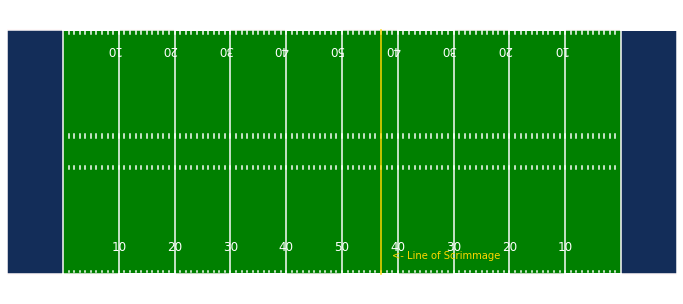

67


In [263]:
# plot the field as the plotspace
plot_field(highlight_los = True, highlight_los_number = los)
plt.show()

## Plot Play with Player Direction

In [255]:
# define a line of scrimmage function
def line_of_scrimmage(playid):
    play_info = data.loc[data['playid'] == playid]
    pos_team = play_info['possessionteam']
    pos = play_info.loc[play_info['possessionteam'] == pos_team]
    if pos['possessionteam'].tolist()[0] != pos['fieldposition'].tolist()[0]:
        los = 110 - pos['yardline'].tolist()[0]
    else:
        los = pos['yardline'].tolist()[0]
    '''
    if pos['x_standard'].tolist()[0] > 60:
        los = 110 - pos['yardline'].tolist()[0]
    else:
        los = pos['yardline'].tolist()[0]
    '''
    return los

In [513]:
# function to plot a play - arrows are direction
'''
    Requires a play ID
    can turn on/off orientation and direction arrows
    can turn on/off end of play yard line
    default is on
    '''
def plot_play(playid, 
             show_end = True, # show the finish yard line of the play
             show_los = True, # show line of scrimmage of play
             show_orientation = True, # turn on/off orientation arrow (default = on)
             show_direction = True, # turn on/off direction arrow (default = on)
             show_yards = True, # show the yards gained
             show_play_info = True): # display team info - score, name
    # get the play info
    play_info = data.loc[data['playid'] == playid]
    # plot line of scrimmage
    if show_los:
        los = line_of_scrimmage(playid)
        fig, ax = plot_field(highlight_los = True,
                    highlight_los_number = los)
    else:
        fig, ax = plot_field()
    # scatter plot of players initial position
    '''
    # plot away team
    data.loc[(data['playid'] == playid)&(data['team'] == 'away')].plot(
        x = 'x_standard', 
        y = 'y_standard', 
        kind = 'scatter', 
        ax = ax, 
        color = 'cyan',
        s = 30, 
        legend = 'Away')
    # plot home team
    data.loc[(data['playid'] == playid)&(data['team'] == 'home')].plot(
        x = 'x_standard',
        y = 'y_standard',
        kind = 'scatter',
        ax = ax,
        color = 'tab:orange',
        s = 30,
        legend = 'Home')
    '''
    # plot the rusher as red
    play_info.loc[play_info['rusher'] == 1].plot(
        x = 'x_standard',
        y = 'y_standard',
        kind = 'scatter',
        ax = ax,
        color = 'red',
        s = 40,
        legend = 'Rusher')
    
  # define orientation arrow
    if show_orientation:
        for index, row in play_info.iterrows():
            # length of arrow = 1.25 - just to show it a bit
            dx = 1.25 * math.cos(math.radians(row['orientation']))
            dy = 1.25 * math.sin(math.radians(row['orientation']))
            # plot the arrow
            plt.arrow(x = row['x_standard'],
                     y = row['y_standard'],
                     dx = dx,
                     dy = dy,
                     color = 'cyan' if row['team'] == 'away' else 'tab:orange')
    # define direction arrow
    rush = play_info.loc[play_info['rusher'] == 1]
    if show_direction:
        # plot rusher arrow red
        '''for index, row in play_info.iterrows():
            # calculate distance traveled after 2 second
            d = row['s'] + row['a']/2 
            dx = d * math.cos(math.radians(row['dir']))
            dy = d * math.sin(math.radians(row['dir']))
            # plot the arrow
            plt.arrow(x = row['x_standard'],
                     y = row['y_standard'],
                     dx = dx,
                     dy = dy,
                     head_starts_at_zero = True,
                     length_includes_head = True,
                     head_width = 0.5, 
                     color = 'cyan' if row['team'] == 'away' else 'tab:orange')
                     '''
        rd = float(rush['s'] + rush['a']/2)
        rdx = float(rd * math.cos(math.radians(rush['dir'])))
        rdy = float(rd * math.sin(math.radians(rush['dir'])))
        plt.arrow(x = float(rush['x_standard']),
                 y = float(rush['y_standard']),
                 dx = rdx,
                 dy = rdy,
                 head_starts_at_zero = True,
                 length_includes_head = True,
                 head_width = 0.6,
                 color = 'red')
    # plot the finish yard line
    if show_end:
        for index, row in play_info.iterrows():
            if row['x_standard'] > 60:
                end_of_play = 110 - row['yardline'] + row['yards']
            else:
                end_of_play = row['yardline'] + row['yards'] + 10
        plt.vlines(x = end_of_play,
                  ymin = 0,
                  ymax = 53.3,                      
                   color = 'red')
    
    # show the yards gained
    if show_yards:
        if los < 50:
            y_los = play_info['yardline'].tolist()[0]
        else:
            y_los = 110 - play_info['yardline'].tolist()[0]
        # y_los + 10
        yard_strip = patches.Rectangle((los, 52.3), # height of rectangle
                                      play_info['yards'].tolist()[0], # width of rectangle
                                      1, linewidth = 0.1,
                                      facecolor = 'lavender')
        ax.add_patch(yard_strip)
        plt.text(los, 50, 
                'Yards: {}'.format(play_info['yards'].tolist()[0]),
                color = 'lavender',
                fontsize = 12)
    # display info
    if show_play_info:
        # tuples of visitor and home info
        visitor = (play_info['visitorteamabbr'].tolist()[0],
                  play_info['visitorscorebeforeplay'].tolist()[0],
                  'cyan')
        home = (play_info['hometeamabbr'].tolist()[0],
               play_info['homescorebeforeplay'].tolist()[0],
               'tab:orange')
        # if home team has the ball
        if play_info['possessionteam'].tolist()[0] == home[0]:
            team_l, score_l, color_l = home
            team_r, score_r, color_r = visitor
            
            play_info.loc[play_info['team'] == 'away'].plot(
                x = 'x_standard', 
                y = 'y_standard', 
                kind = 'scatter', 
                ax = ax, 
                color = color_r,
                s = 30, 
                legend = 'Away')
            play_info.loc[play_info['team'] == 'home'].plot(
                x = 'x_standard', 
                y = 'y_standard', 
                kind = 'scatter', 
                ax = ax, 
                color = color_l,
                s = 30, 
                legend = 'Home')
            # plot team and score in endzones
            plt.text(x = 1, y = 26,
                     s = '{}: {}'.format(team_l, score_l), 
                     color = color_l,
                    fontsize = 12)
            plt.text(x = 111, y = 26,
                    s = '{}: {}'.format(team_r, score_r),
                    color = color_r,
                    fontsize = 12)
        
        else: # visitors have the ball
            team_l, score_l, color_l = visitor
            team_r, score_r, color_r = home
            # plot offense team
            play_info.loc[play_info['offense'] == '1'].plot(
                x = 'x_standard', 
                y = 'y_standard', 
                kind = 'scatter', 
                ax = ax, 
                color = color_l,
                s = 30, 
                legend = 'Offense')
            # plot defense team
            play_info.loc[play_info['offense'] == '0'].plot(
                x = 'x_standard', 
                y = 'y_standard', 
                kind = 'scatter', 
                ax = ax, 
                color = color_r,
                s = 30, 
                legend = 'Defense')
            
            # plot team and score in endzones
            plt.text(x = 1, y = 26,
                    s = '{}: {}'.format(team_l, score_l), 
                    rotation = 90,
                    color = color_l,
                    size = 20)
            plt.text(x = 111, y = 26,
                    s = '{}: {}'.format(team_r, score_r),
                    rotation = -90,
                    color = color_r,
                    size = 20)
        
    
    plt.title('Home: {} {}  Away: {} {}   Possession Team: {}'.format(row['hometeamabbr'], row['homescorebeforeplay'], row['visitorteamabbr'], row['visitorscorebeforeplay'], row['possessionteam']))   

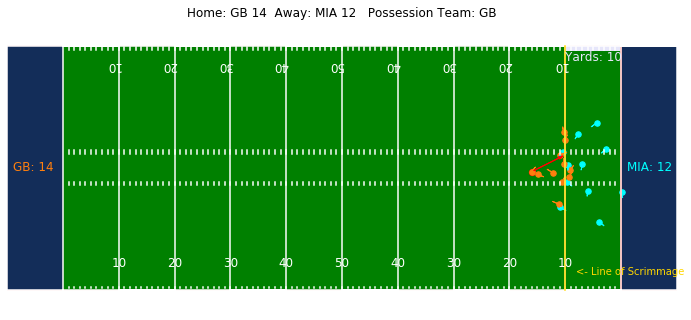

In [514]:
# plot a play
playid = list(set(data['playid']))[4357]
plot_play(playid)
plt.show()
#del plt

## Multiple Scatter Plots for a GIF

In [448]:
# working plays 4357 - touchdown
# 123 - 5 yrd gain

import os
playid = list(set(data['playid']))[4357]
play = data.loc[data['playid'] == playid]

In [471]:
# plot the different scatter plots 
def plots_for_gif(sec, playno, show = False):
    '''
    inputs: sec = number of seconds the play lasts (integer)
    playno = an integer between 0 and 31006
    show = show the scatter plots - default is False
    
    plot the location of players in quarter second time intervals
    saves the pngs to convert to gif
    
    output: sec*4 scatter plots
    print statement of success - requires os package to be imported
    '''
    playid = list(set(data['playid']))[playno]
    play = data.loc[data['playid'] == playid]
    for i in np.arange(0, sec, 0.25):
        # set the field as the plotspace 
        los = line_of_scrimmage(playid)
        fig, ax = plot_field(highlight_los = True,
                    highlight_los_number = los) 
        # empty lists for scatter plots
        x_list = []
        y_list = []
        color_list = []
        # play information
        hometeam = play['hometeamabbr'].tolist()[0]
        visitorteam = play['visitorteamabbr'].tolist()[0]
        homescore = play['homescorebeforeplay'].tolist()[0]
        visitorscore = play['visitorscorebeforeplay'].tolist()[0]
        # get offense and defense
        if play['possessionteam'].tolist()[0] == play['hometeamabbr'].tolist()[0]:
            offense = str(play['hometeamabbr'].tolist()[0])
            defense = str(play['visitorteamabbr'].tolist()[0])
        else:
            offense = str(play['visitorteamabbr'].tolist()[0])
            defense = str(play['hometeamabbr'].tolist()[0])
        for index, row in play.iterrows():
            # coordinates of player position
            x = row['x_standard']
            y = row['y_standard']
            # distance traveled = speed*time + acc/2*time^2
            d = row['s']*i + row['a']/2*i**2
            dx = d * math.cos(math.radians(row['dir']))
            dy = d * math.sin(math.radians(row['dir']))
            # keep players on the field
            if y + dy > 53.3:
                y_coord = 53
            elif y + dy < 0:
                y_coord = 0
            else:
                y_coord = y + dy
            if x + dx > 120:
                x_coord = 120
            elif x + dx < 0:
                x_coord = 0
            else:
                x_coord = x + dx
            x_list.append(x_coord)
            y_list.append(y_coord)
            # color the points
            # rusher = red
            if row['rusher'] == 1:
                color_list.append('red')
            # offense = orange
            elif row['offense'] == 1:
                color_list.append('orange')
            # defense = cyan
            else: 
                color_list.append('tab:blue')
            # print the yards gained at the top of the plot
            yard_strip = patches.Rectangle((los, 52.3), # height of rectangle
                                          play['yards'].tolist()[0], # width of rectangle
                                          1, linewidth = 0.1,
                                          facecolor = 'lavender')
            ax.add_patch(yard_strip)
            plt.text(los, 50, 
                    'Yards: {}'.format(play['yards'].tolist()[0]),
                    color = 'lavender',
                    fontsize = 12)
            #print('x: {}, y: {}, dx: {}, dy: {}'.format(x,y,dx,dy))
            plt.scatter(x = x_list,
                   y = y_list, 
                    color = color_list,  
                    s = 50)   
        plt.title('Home: {} {}   Visitor: {} {}   Offense: {}'.format(hometeam,\
                                                                 homescore,\
                                                                 visitorteam,\
                                                                 visitorscore,\
                                                                 offense))
        
        plt.text(x = 3, y = 26, s = str(offense), 
                 rotation = 90, color = 'orange', size = 20)
        plt.text(x = 112, y = 26, s = str(defense), 
                 rotation = -90, color = 'tab:blue', size = 20)
        if show:
            plt.show()
        filename = str(playno) + 'step' + str(i) + '.png'
        plt.savefig(filename, dpi = 96)
        plt.gca()
    print('Success! {} png files saved in {}'.format(len(filename), os.getcwd()))


Success! 15 png files saved in /Users/jasonmaloney/Documents/GitHub/Rush-Yards


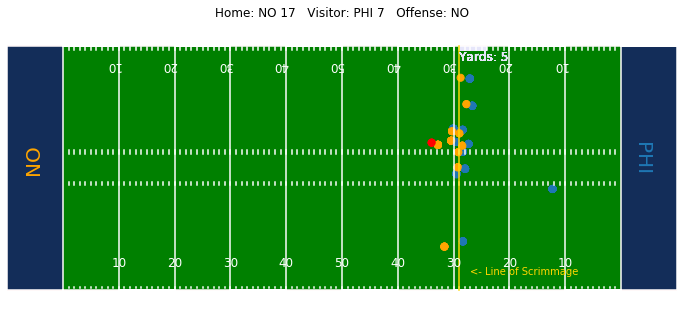

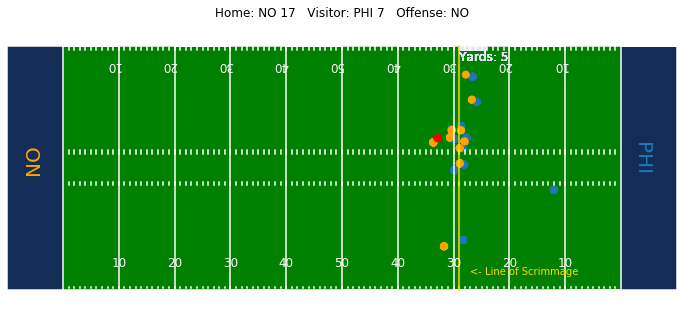

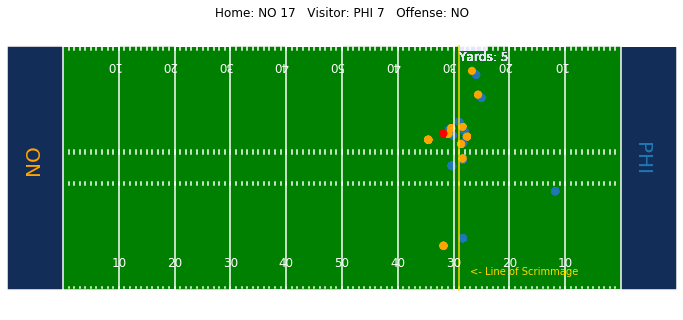

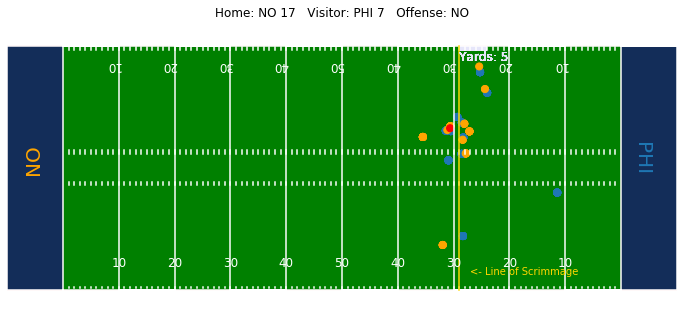

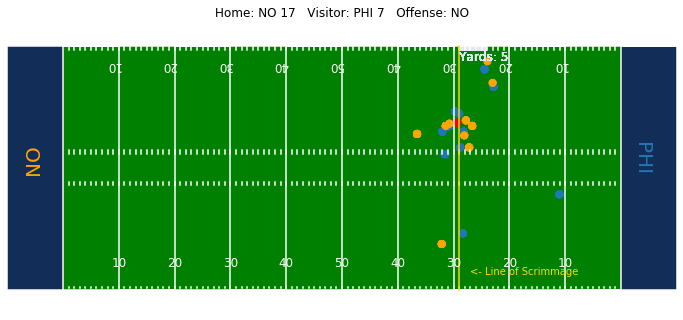

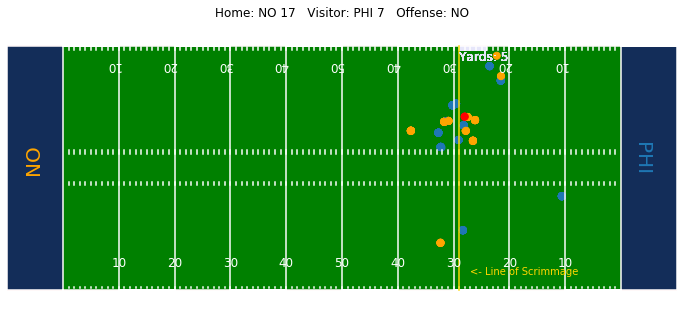

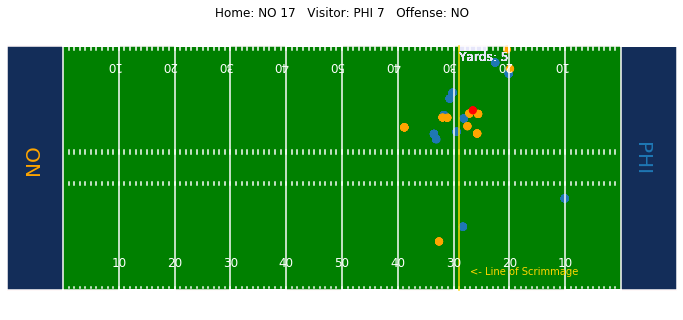

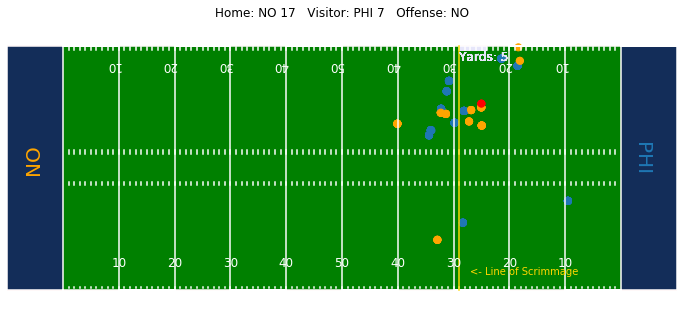

In [504]:
plots_for_gif(2, 123)

In [505]:
from PIL import Image
import glob

### CONVERT PNG FILES TO GIF
# should be an endless loop
playno = 123
# create the frames
frames = []
# import the images
imgs = glob.glob(str(playno) + 'step*' + '.png')
imgs.sort()
# store the plots in a list
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)
# save as GIF for continuous loop
frames[0].save('Play' + str(playno) + 'gif.gif', format = 'GIF',
              append_images = frames[1: ],
              save_all = True,
              duration = 300, loop = 0)

In [ ]:
# code to create the slides
# run this in the terminal
# change the directory first
#jupyter nbconvert Yard Prediction Field Graph.ipynb --to slides --post serve